In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
scope = "user-library-read"
auth_manager = SpotifyClientCredentials(client_id="id code", client_secret="secret code")
sp = spotipy.Spotify(auth_manager = auth_manager)

In [17]:
def get_playlist_df(user, playlist_id):
    
    playlist_features_list = ['artist', 'album', 'track_name', 'track_id', 'acousticness', 'danceability',
                         'energy', 'instrumentalness', 'liveness', 'loudness', 'mode', 'tempo', 'valence']
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    playlist = sp.user_playlist_tracks(user, playlist_id)['items']
    for track in playlist:
        playlist_features = {}
        #get metadata
        playlist_features['artist'] = track['track']['album']['artists'][0]['name']
        playlist_features['album'] = track['track']['album']['name']
        playlist_features['track_name'] = track['track']['name']
        playlist_features['track_id'] = track['track']['id']
        
        #get audio features
        audio_features = sp.audio_features(playlist_features['track_id'])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
                                                              
        #concat the dataframes
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
    
    return playlist_df

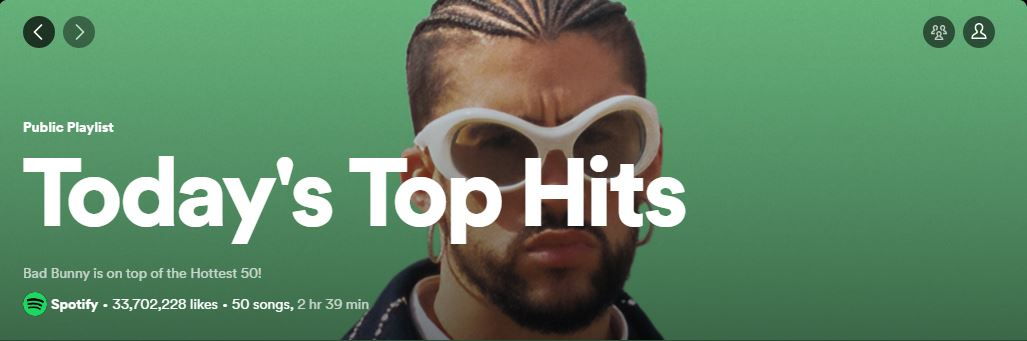

In [18]:
today_top_hits_playlist = '37i9dQZF1DXcBWIGoYBM5M' #took from 24 may 2023
get_playlist_df('spotify', today_top_hits_playlist)

,artist,album,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,tempo,valence
0,Bad Bunny,WHERE SHE GOES,WHERE SHE GOES,7ro0hRteUMfnOioTFI5TG1,0.14300,0.652,0.800,0.629000,0.1120,-4.019,0,143.978,0.2340
1,SZA,SOS,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,0.05210,0.644,0.735,0.144000,0.1610,-5.747,1,88.980,0.4180
2,Rema,Calm Down (with Selena Gomez),Calm Down (with Selena Gomez),0WtM2NBVQNNJLh6scP13H8,0.38200,0.801,0.806,0.000669,0.1140,-5.206,1,106.999,0.8020
3,Miley Cyrus,Flowers,Flowers,0yLdNVWF3Srea0uzk55zFn,0.06320,0.707,0.681,0.000005,0.0322,-4.325,1,117.999,0.6460
4,Beyoncé,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),AMERICA HAS A PROBLEM (feat. Kendrick Lamar),6l8mgVN9Xf1hiDIFGA6CTE,0.01120,0.784,0.700,0.000018,0.1630,-5.289,1,126.015,0.2040
5,PinkPantheress,Boy's a liar Pt. 2,Boy's a Liar Pt. 2,6AQbmUe0Qwf5PZnt4HmTXv,0.25200,0.696,0.809,0.000128,0.2480,-8.254,1,132.962,0.8570
6,FIFTY FIFTY,The Beginning: Cupid,Cupid - Twin Ver.,7FbrGaHYVDmfr7KoLIZnQ7,0.43500,0.783,0.592,0.000004,0.3470,-8.332,0,120.018,0.7260
7,The Weeknd,Die For You (Remix),Die For You - Remix,7oDd86yk8itslrA9HRP2ki,0.23200,0.531,0.525,0.000000,0.4410,-6.500,0,66.900,0.5020
8,Harry Styles,As It Was,As It Was,4LRPiXqCikLlN15c3yImP7,0.34200,0.520,0.731,0.001010,0.3110,-5.338,0,173.930,0.6620
9,David Kushner,Daylight,Daylight,1odExI7RdWc4BT515LTAwj,0.83000,0.508,0.430,0.000441,0.0930,-9.475,0,130.090,0.3240


**acousticness** = A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. <br>
**danceability** = Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. <br>
**energy** = Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. <br>
**instrumentalness** = Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.<br>
**liveness** = Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.<br>
**loudness** = The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.<br>
**mode** = Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. <br>
**tempo** = The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.<br>
**valence** = A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
